In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [3]:
# import required module
import os
# assign directory
directory = 'AReM'

# iterate over files in
# that directory
folder_file_dict = {}
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is not a file
    if not os.path.isfile(f):
        file_list = [os.path.join(f, sub_filename) for sub_filename in os.listdir(f)]
        folder_file_dict[filename] = file_list

In [36]:
import pandas as pd
import csv
for key in folder_file_dict:
    for file in folder_file_dict[key]:
        if file == r"AReM\bending2\dataset4.csv":
            with open(file, "r", encoding="shift_jis", errors="", newline="" ) as f:
                lst = csv.reader(f)
                new_rows_list = []
                for row in lst:
                    new_row = row[0].replace(" ",",")
                    print(new_row)
                    new_rows_list.append(new_row)
            with open(file, "w", encoding="shift_jis", errors="", newline="" ) as f:
                writer = csv.writer(f)
                for row in new_rows_list:
                    columns = [c.strip() for c in row.strip(', ').split(',')]
                    writer.writerow(columns)                
            break

#,Task:,bending2
#,Frequency,(Hz):,20
#,Clock,(millisecond):,250
#,Duration,(seconds):,120
#,Columns:,time
0,32.50,0.50,0.00,0.00,19.00,1.00,
250,32.50,0.50,0.00,0.00,18.50,0.50,
500,32.75,0.43,1.00,0.00,18.00,0.00,
750,32.50,0.50,0.00,0.00,17.50,0.50,
1000,32.50,0.50,7.50,0.50,17.50,0.87,
1250,32.67,0.47,11.00,1.00,16.75,0.83,
1500,32.50,0.50,6.25,0.83,18.00,0.00,
1750,32.50,0.50,3.50,0.87,18.00,0.00,
2000,32.33,0.47,6.00,0.00,18.33,0.47,
2250,32.67,0.47,8.00,0.82,18.00,0.00,
2500,32.50,0.50,8.33,3.30,16.67,0.47,
2750,32.50,0.50,10.33,1.25,16.00,1.22,
3000,32.25,0.83,9.00,3.08,16.00,0.71,
3250,32.00,0.00,2.67,0.47,15.75,0.83,
3500,31.75,0.43,2.75,1.09,16.50,1.12,
3750,32.00,0.00,1.00,0.00,17.50,0.87,
4000,32.25,0.83,0.00,0.00,17.50,0.50,
4250,32.25,0.43,0.00,0.00,17.00,1.00,
4500,31.75,0.43,5.33,3.30,17.75,0.43,
4750,31.50,0.50,9.50,0.50,17.75,0.43,
5000,31.50,0.50,5.00,2.16,17.33,0.47,
5250,31.50,0.50,4.50,0.50,17.50,0.50,
5500,31.67,0.47,4.50,1.12,18.00,0.00,
5750,31.50,0.50,1.67,0.

#,Task:,bending2
#,Frequency,(Hz):,20
#,Clock,(millisecond):,250
#,Duration,(seconds):,120
#,Columns:,time
0,32.50,0.50,0.00,0.00,19.00,1.00,
250,32.50,0.50,0.00,0.00,18.50,0.50,
500,32.75,0.43,1.00,0.00,18.00,0.00,
750,32.50,0.50,0.00,0.00,17.50,0.50,
1000,32.50,0.50,7.50,0.50,17.50,0.87,
1250,32.67,0.47,11.00,1.00,16.75,0.83,
1500,32.50,0.50,6.25,0.83,18.00,0.00,
1750,32.50,0.50,3.50,0.87,18.00,0.00,
2000,32.33,0.47,6.00,0.00,18.33,0.47,
2250,32.67,0.47,8.00,0.82,18.00,0.00,
2500,32.50,0.50,8.33,3.30,16.67,0.47,
2750,32.50,0.50,10.33,1.25,16.00,1.22,
3000,32.25,0.83,9.00,3.08,16.00,0.71,
3250,32.00,0.00,2.67,0.47,15.75,0.83,
3500,31.75,0.43,2.75,1.09,16.50,1.12,
3750,32.00,0.00,1.00,0.00,17.50,0.87,
4000,32.25,0.83,0.00,0.00,17.50,0.50,
4250,32.25,0.43,0.00,0.00,17.00,1.00,
4500,31.75,0.43,5.33,3.30,17.75,0.43,
4750,31.50,0.50,9.50,0.50,17.75,0.43,
5000,31.50,0.50,5.00,2.16,17.33,0.47,
5250,31.50,0.50,4.50,0.50,17.50,0.50,
5500,31.67,0.47,4.50,1.12,18.00,0.00,
5750,31.50,0.50,1.67,0.

In [37]:
import pandas as pd
import csv
header = []
df_list = []
for key in folder_file_dict:
    for file in folder_file_dict[key]:
        with open(file, "r", encoding="shift_jis", errors="", newline="" ) as f:
            lst = csv.reader(f, delimiter=",")
            for i,row in enumerate(lst):
                if i==4:
                    if header == []:
                        temp_col = row[0].replace("# Columns: ","")
                        row[0] = temp_col
                        header = row
                    break
            df = pd.DataFrame(lst)
            new_row = pd.DataFrame(header)
            df = pd.concat([new_row.T, df])
            new_file = file.replace('.csv','_new.csv')
            new_header = df.iloc[0] #grab the first row for the header
            df = df[1:] #take the data less the header row
            df.columns = new_header #set the header row as the df header
            df['lable']=key
#             df.to_csv(new_file, sep=",", header = True,index=False)
            df_list.append(df)
merged = pd.concat(df_list)
merged.to_csv('merged.csv', index=None, header=True)    

In [35]:
df = pd.read_csv("merged.csv")

In [36]:
df.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0     0      39.25       0.43      22.75       0.43      33.75        1.3   
1   250      39.25       0.43      23.00       0.00      33.00        0.0   
2   500      39.25       0.43      23.25       0.43      33.00        0.0   
3   750      39.50       0.50      23.00       0.71      33.00        0.0   
4  1000      39.50       0.50      24.00       0.00      33.00        0.0   

      lable  Unnamed: 8  
0  bending1         NaN  
1  bending1         NaN  
2  bending1         NaN  
3  bending1         NaN  
4  bending1         NaN

In [37]:
df.drop(['time','Unnamed: 8'], axis=1, inplace=True)

In [38]:
df.head()

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23     lable
0      39.25       0.43      22.75       0.43      33.75        1.3  bending1
1      39.25       0.43      23.00       0.00      33.00        0.0  bending1
2      39.25       0.43      23.25       0.43      33.00        0.0  bending1
3      39.50       0.50      23.00       0.71      33.00        0.0  bending1
4      39.50       0.50      24.00       0.00      33.00        0.0  bending1

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = df['lable']
labels_id = le.fit_transform(y)
labels_id
df['lable'] = labels_id

In [50]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

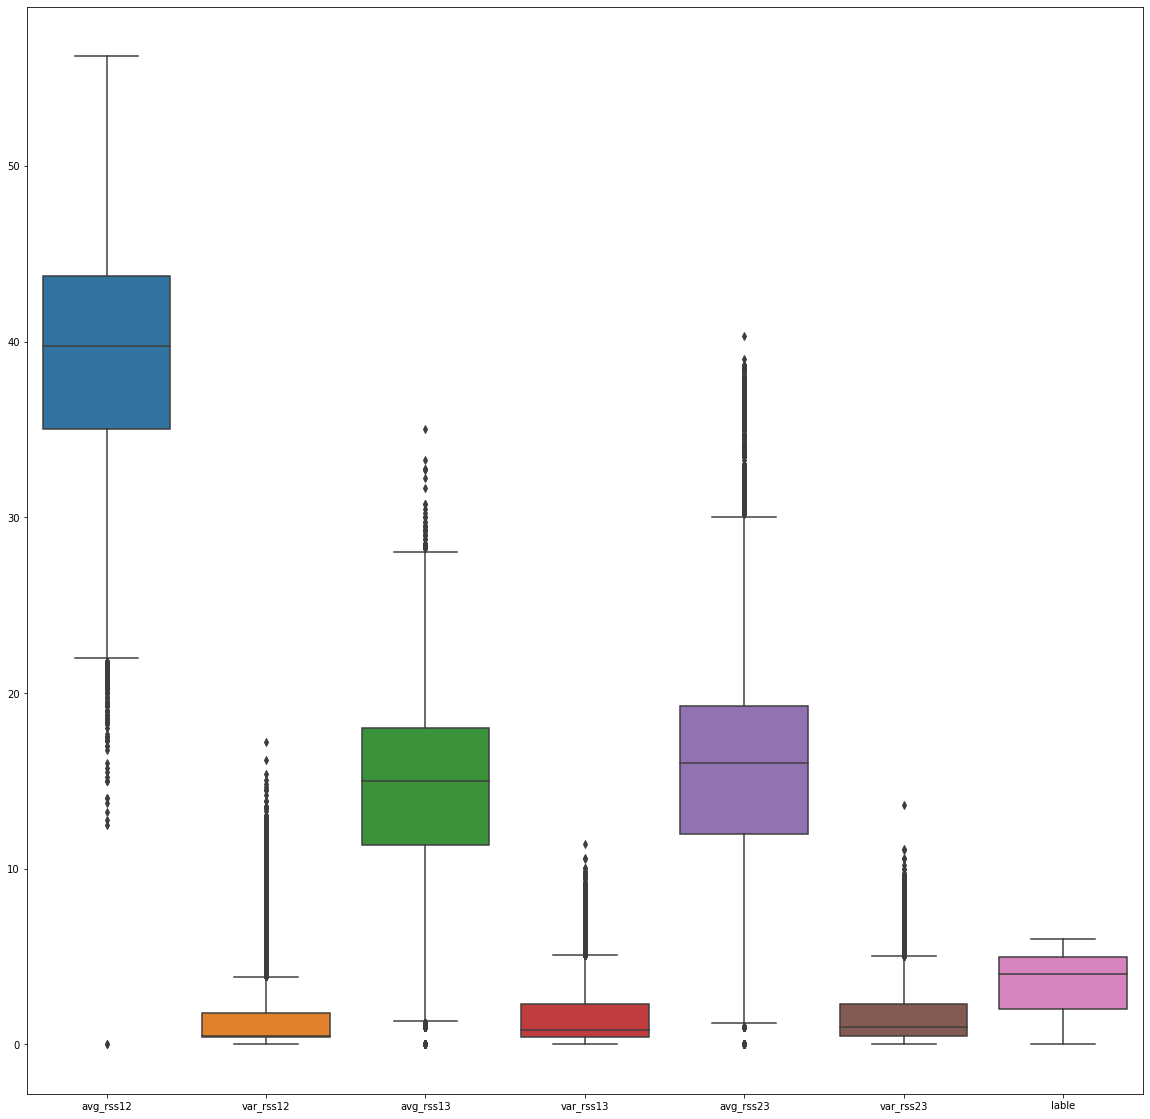

In [43]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df , ax = ax)

In [44]:
q = df['var_rss12'].quantile(.99)
df_new = df[df['var_rss12'] < q]

<AxesSubplot:>

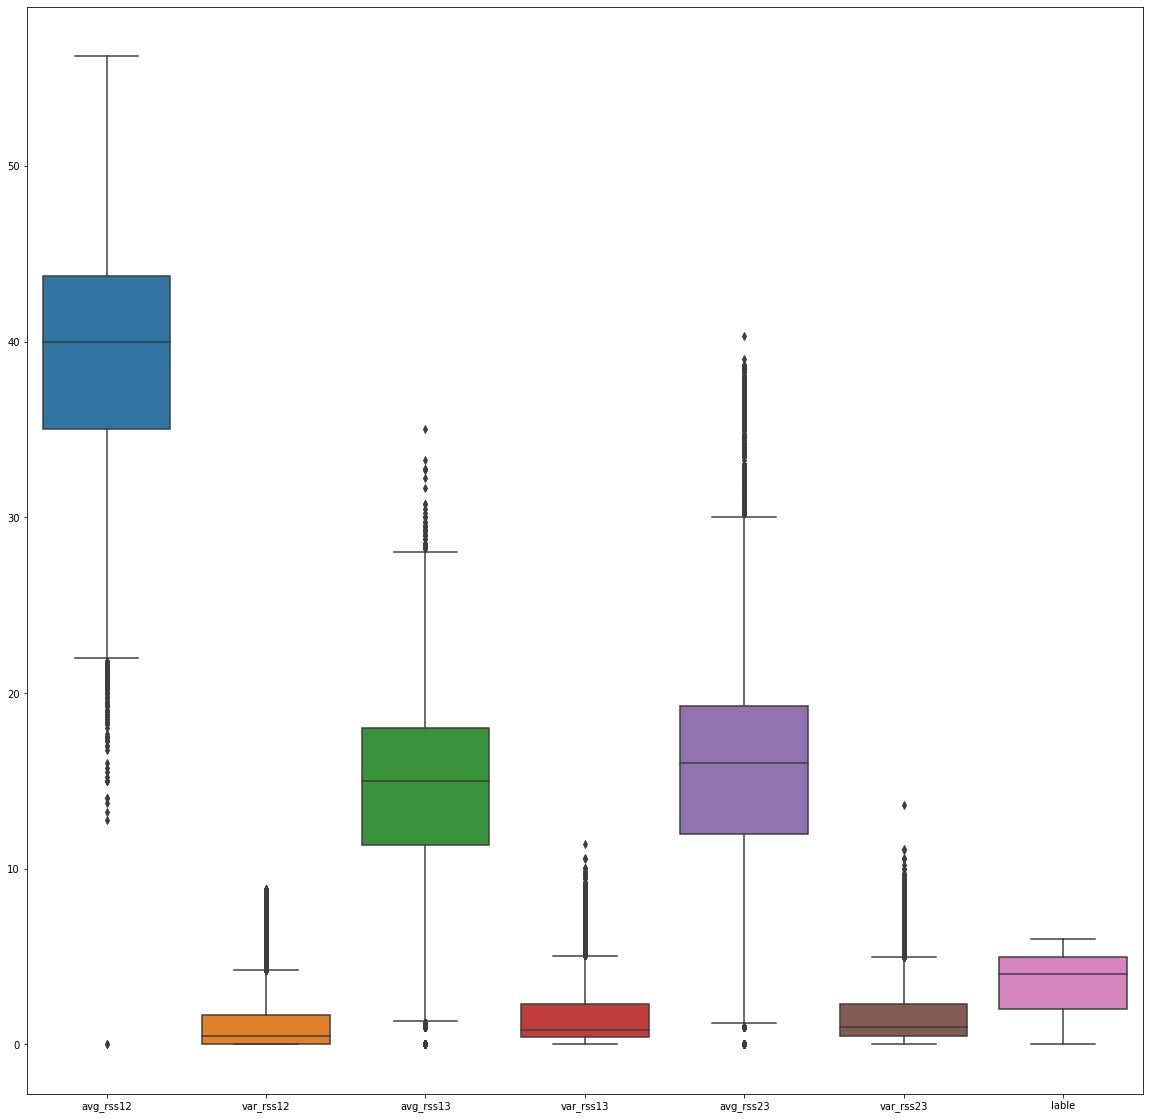

In [45]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [46]:
q = df_new['avg_rss13'].quantile(.99)
df_new = df_new[df_new['avg_rss13'] < q]

<AxesSubplot:>

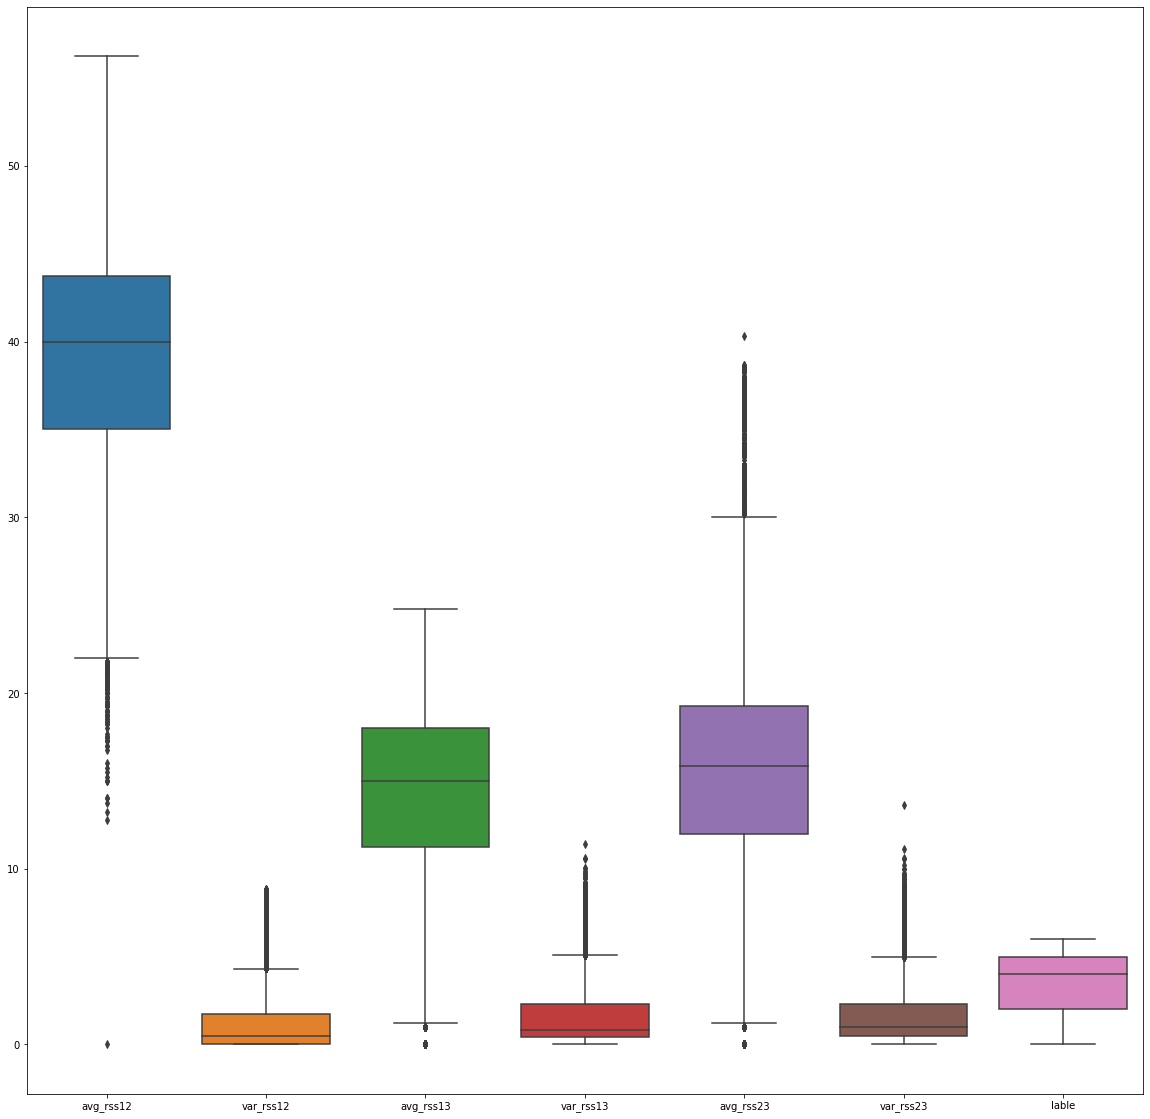

In [47]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [48]:
q = df_new['var_rss13'].quantile(.95)
df_new = df_new[df_new['var_rss13'] < q]

In [49]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

<AxesSubplot:>

In [50]:
q = df_new['avg_rss23'].quantile(.95)
df_new = df_new[df_new['avg_rss23'] < q]

<AxesSubplot:>

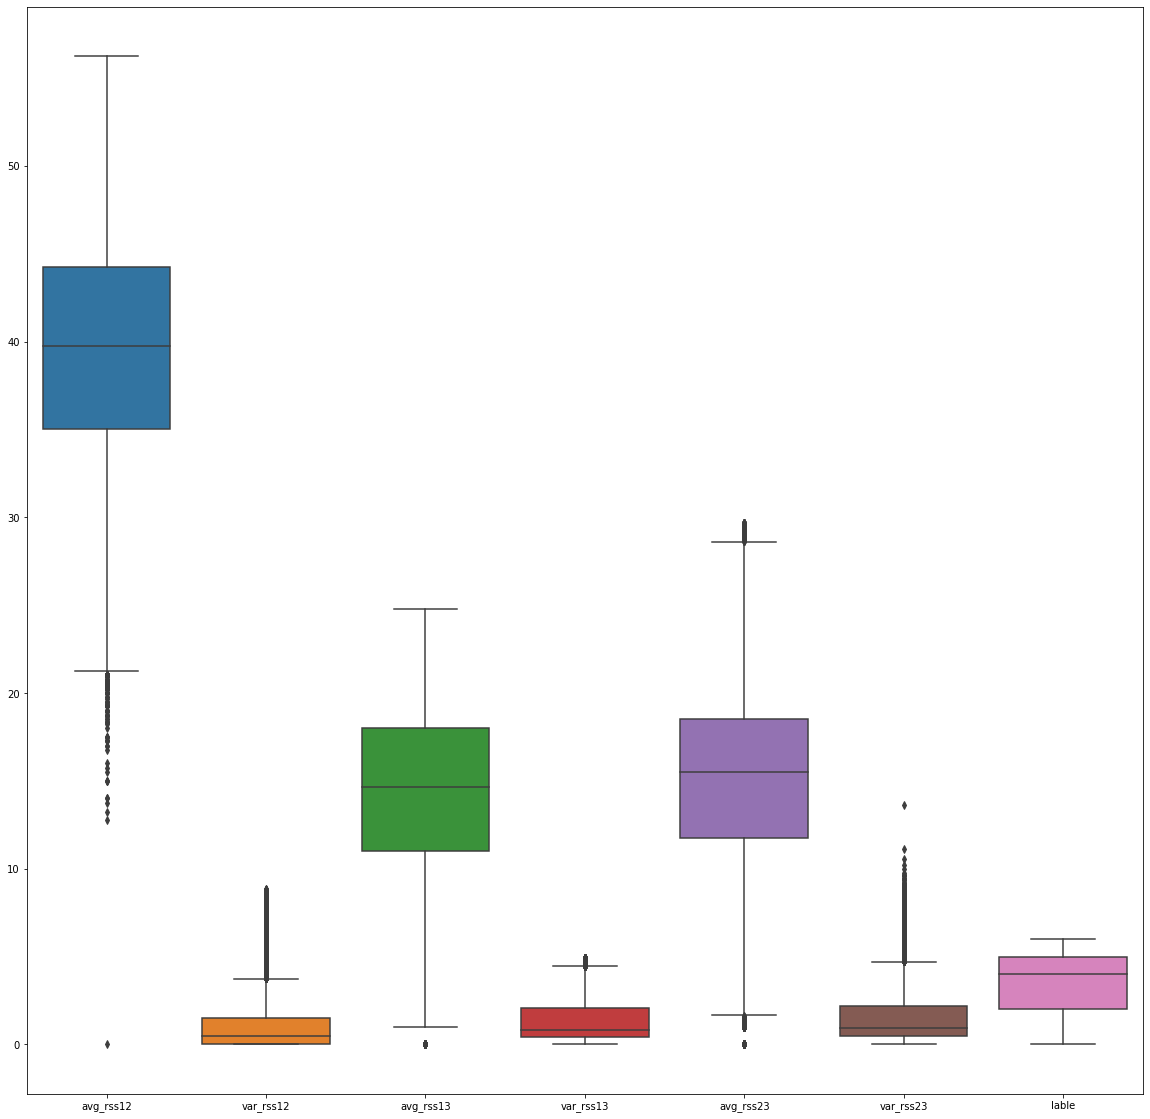

In [51]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [52]:
q = df_new['var_rss23'].quantile(.95)
df_new = df_new[df_new['var_rss23'] < q]

<AxesSubplot:>

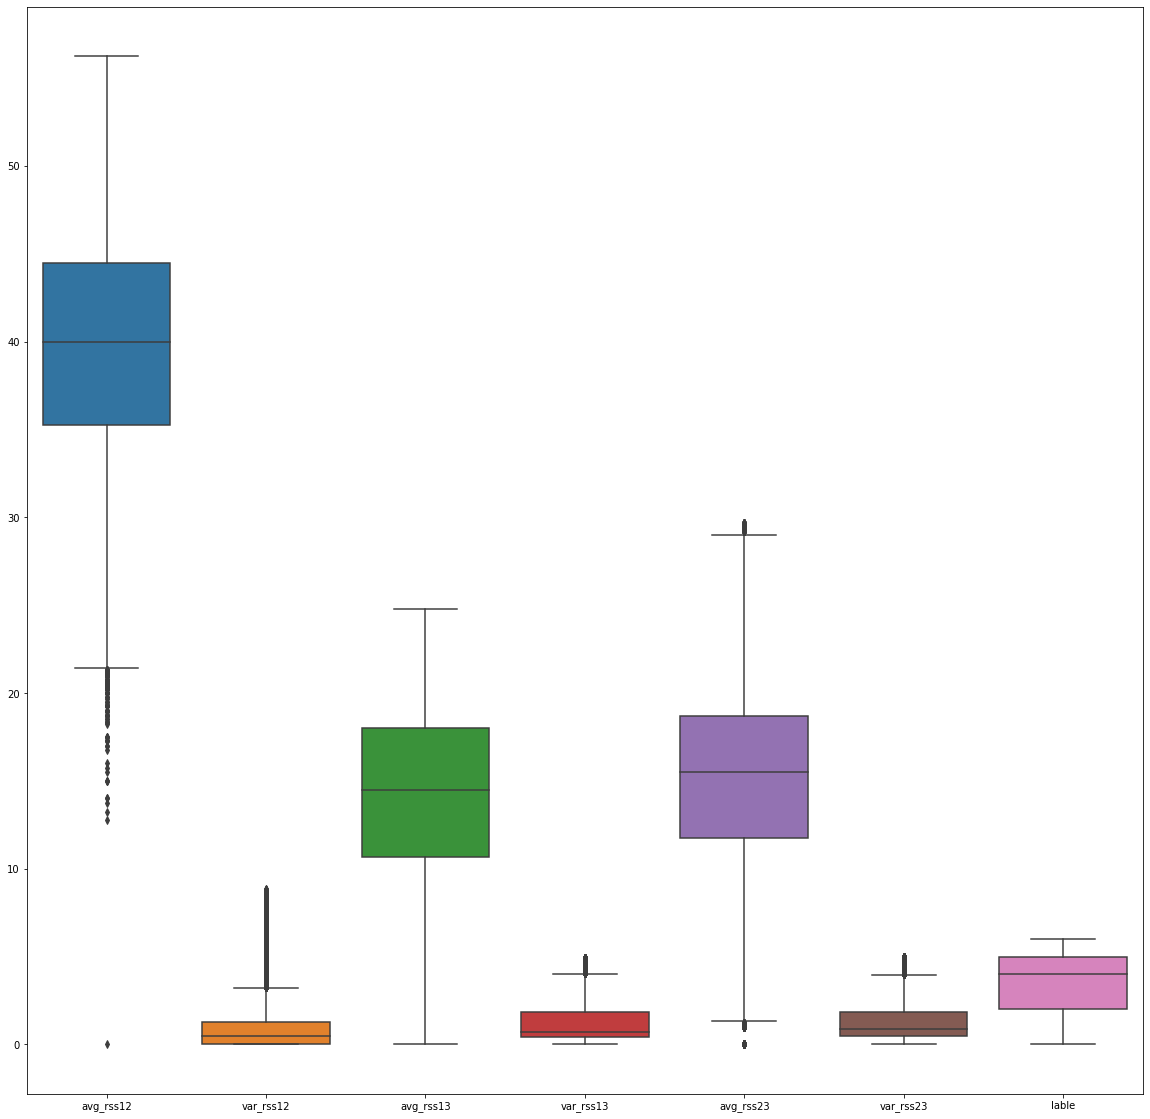

In [53]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [54]:
q = df_new['avg_rss12'].quantile(.60)
df_new = df_new[df_new['avg_rss12'] < q]

<AxesSubplot:>

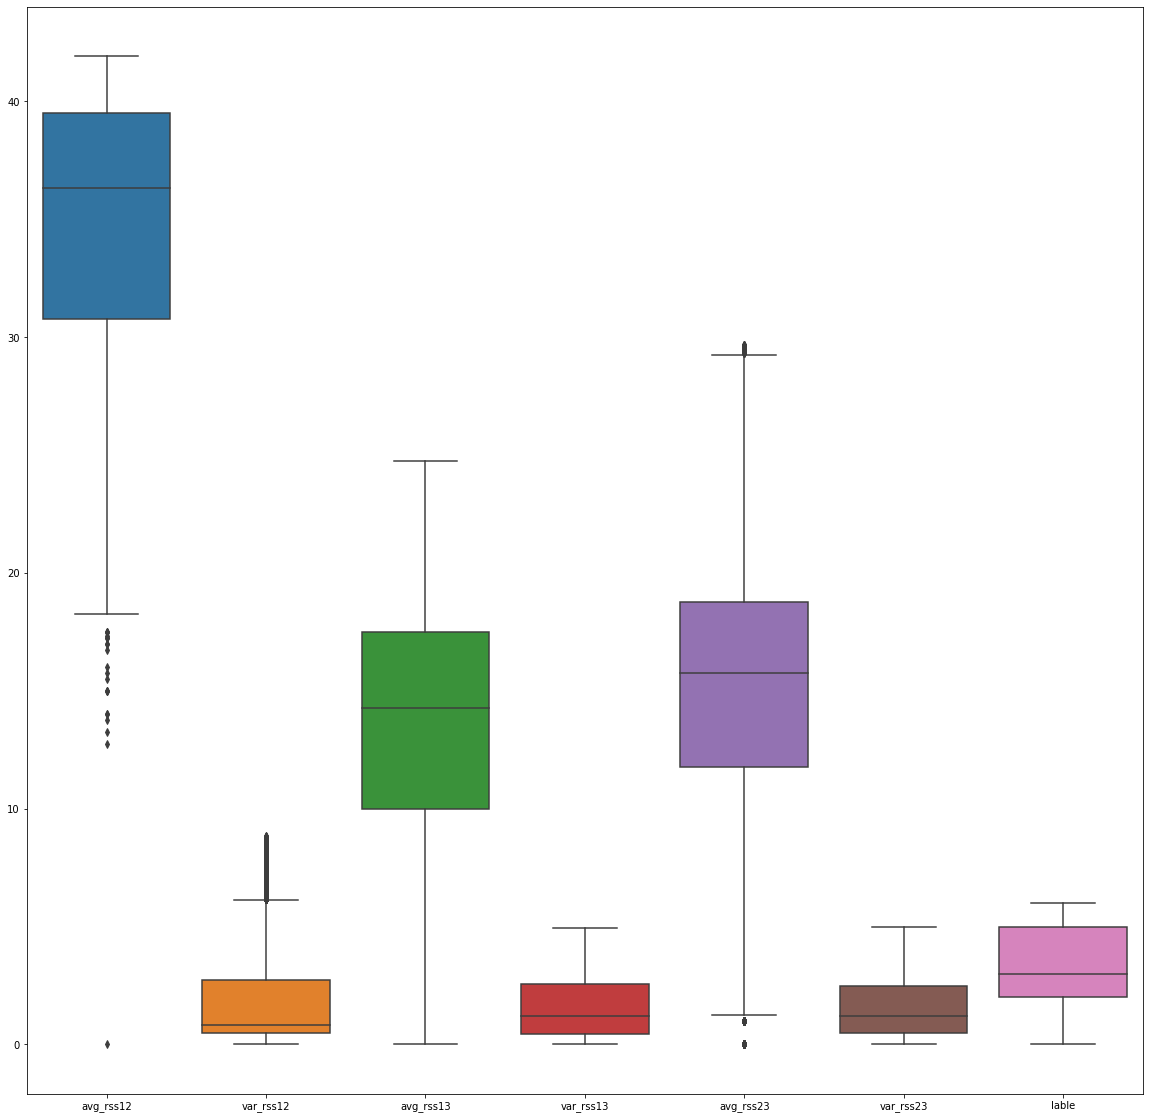

In [55]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new , ax = ax)

In [56]:
y = df_new['lable']
y

761      0
762      0
763      0
764      0
765      0
        ..
42233    6
42234    6
42235    6
42236    6
42238    6
Name: lable, Length: 20735, dtype: int32

In [57]:
x = df_new.drop(columns=['lable'])
x

avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
761        39.50       0.87      14.75       1.09      29.50       0.50
762        38.50       0.50      19.67       1.25      29.33       0.47
763        38.25       0.83      19.00       0.71      28.50       0.50
764        39.00       0.00      14.75       2.17      29.00       0.82
765        38.00       0.82      16.00       1.00      28.00       1.00
...          ...        ...        ...        ...        ...        ...
42233      37.25       7.26      14.00       1.58      13.25       4.92
42234      31.50       1.66      12.50       3.20      14.25       4.44
42235      27.33       1.25      11.33       0.94      20.00       4.00
42236      37.80       7.68      14.20       2.48      17.25       0.83
42238      32.67       3.09      18.67       0.47      14.00       3.16

[20735 rows x 6 columns]

In [23]:
scalar = StandardScaler()
ProfileReport(pd.DataFrame(scalar.fit_transform(x)))

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
x_scaled = scalar.fit_transform(x)

<AxesSubplot:>

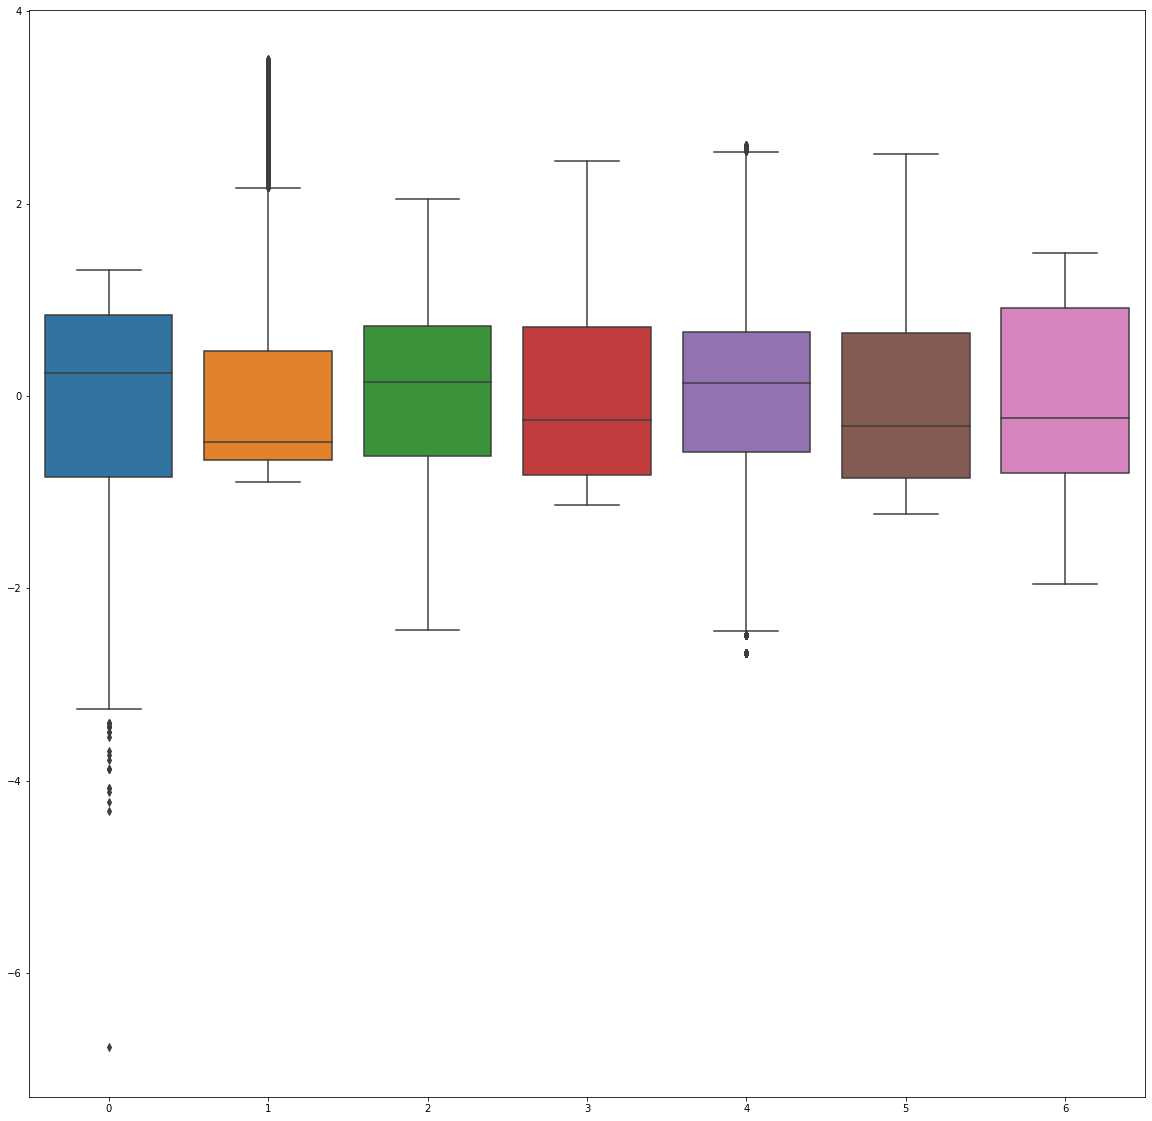

In [59]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_new))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar , ax = ax)

In [60]:
x_scaled

array([[ 0.84585216, -0.46175564,  0.23344061, -0.33932463,  2.57545706,
        -0.84872997],
       [ 0.65303607, -0.64600347,  1.12368469, -0.22312774,  2.54524955,
        -0.87130118],
       [ 0.60483204, -0.48167432,  1.00245227, -0.61529226,  2.39776583,
        -0.84872997],
       ...,
       [-1.50071967, -0.27252814, -0.3853876 , -0.44825922,  0.88739036,
         1.78457855],
       [ 0.5180648 ,  2.92940035,  0.13392145,  0.67013589,  0.39873947,
        -0.60044659],
       [-0.47108175,  0.64373134,  0.94274077, -0.7895876 , -0.17875704,
         1.15258451]])

In [61]:
y

761      0
762      0
763      0
764      0
765      0
        ..
42233    6
42234    6
42235    6
42236    6
42238    6
Name: lable, Length: 20735, dtype: int32

In [62]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [64]:
vif_score(x)

FEATURE  VIF_SCORE
0  avg_rss12   1.028490
1  var_rss12   1.655619
2  avg_rss13   1.374580
3  var_rss13   1.683724
4  avg_rss23   1.273745
5  var_rss23   1.733073

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled , y , test_size = .20 , random_state = 144)

In [66]:
x_train

array([[-0.1182283 ,  1.34586496,  0.09773267, -0.24491466,  0.30989385,
         1.0547759 ],
       [-1.61255301, -0.68086117,  0.14296865, -0.52814459, -1.28932724,
        -0.40482939],
       [ 0.21919986,  0.57401594,  0.41438453,  0.88074276, -0.66740793,
         1.55886639],
       ...,
       [ 0.07458779,  2.74017285,  0.45962051,  0.57572591, -0.13433423,
        -0.24683088],
       [-0.40745244, -0.89498702,  0.82150835, -0.5354069 ,  0.44316228,
         0.65601776],
       [-0.40745244, -0.89498702, -1.30458271, -0.81863683,  0.62085351,
        -0.84872997]])

In [67]:
x_test

array([[ 0.26740388,  2.74017285,  0.50485649,  0.6773982 ,  1.33161844,
        -0.0963561 ],
       [ 0.17099584, -0.89498702, -0.39986311, -0.52814459, -0.04548861,
        -0.90139614],
       [ 0.89405618, -0.68086117, -0.58080703, -0.18681621, -0.31202546,
        -0.60044659],
       ...,
       [ 0.70124009,  1.55501114,  0.36914855,  2.05723633,  0.44316228,
         0.93439609],
       [ 1.03866825,  0.69850772,  0.64056443,  1.0477758 ,  0.5764307 ,
         0.8591587 ],
       [-0.26284037,  0.06110982,  0.23344061,  0.26344676,  0.13220262,
        -0.24683088]])

In [68]:
x_test[0]

array([ 0.26740388,  2.74017285,  0.50485649,  0.6773982 ,  1.33161844,
       -0.0963561 ])

In [69]:
logr = LogisticRegression(verbose=1)
logr.fit(x_train,y_train )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


LogisticRegression(verbose=1)

In [70]:
logr.predict([x_test[0]])

array([6])

In [71]:
logr.predict_proba([x_test[0]])

array([[1.41201950e-05, 1.31741610e-07, 4.55508358e-01, 6.23424676e-09,
        5.51583911e-07, 2.45000303e-06, 5.44474382e-01]])

In [73]:
decoded_labels = le.inverse_transform(logr.predict([x_test[0]]))
decoded_labels

array(['walking'], dtype=object)

In [74]:
y_test.iloc[0]

2

In [75]:
logr.predict([x_test[1]])

array([4])

In [76]:
y_test.iloc[1]

4

In [77]:
logr.predict([x_test[2]])

array([4])

In [78]:
y_test.iloc[2]

3

In [79]:
logr_lbfgs = LogisticRegression(verbose=1, multi_class='multinomial', solver='lbfgs', penalty='none')
logr_lbfgs.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(verbose=1)

In [80]:
logr_lbfgs.predict([x_test[0]])

array([6])

In [81]:
logr_lbfgs.predict([x_test[1]])

array([4])

In [82]:
logr_lbfgs.predict([x_test[2]])

array([4])

In [84]:
logr_newton_cg = LogisticRegression(verbose=1, multi_class='multinomial', solver='newton-cg', penalty='none')
logr_newton_cg.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s finished


LogisticRegression(solver='newton-cg', verbose=1)

In [85]:
logr_newton_cg.predict([x_test[0]])

array([6])

In [86]:
logr_newton_cg.predict([x_test[1]])

array([4])

In [87]:
logr_newton_cg.predict([x_test[2]])

array([4])

In [89]:
logr_sag = LogisticRegression(verbose=1, multi_class='multinomial', solver='sag', penalty='none')
logr_sag.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 24 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(solver='sag', verbose=1)

In [90]:
logr_sag.predict([x_test[0]])

array([6])

In [91]:
logr_sag.predict([x_test[1]])

array([4])

In [92]:
logr_sag.predict([x_test[2]])

array([4])

In [93]:
logr_saga = LogisticRegression(verbose=1, multi_class='multinomial', solver='saga', penalty='none')
logr_saga.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 29 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(solver='saga', verbose=1)

In [94]:
logr_saga.predict([x_test[0]])

array([6])

In [95]:
logr_saga.predict([x_test[1]])

array([4])

In [96]:
logr_saga.predict([x_test[2]])

array([4])

In [97]:
y_pred_lbfgs = logr_lbfgs.predict(x_test)

In [110]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,y_pred_lbfgs)

array([[[4062,   25],
        [  22,   38]],

       [[3499,  134],
        [ 141,  373]],

       [[2836,  385],
        [ 339,  587]],

       [[2960,  231],
        [  93,  863]],

       [[3414,  232],
        [ 291,  210]],

       [[3849,   68],
        [ 171,   59]],

       [[2877,  310],
        [ 328,  632]]], dtype=int64)

In [101]:
def model_eval(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    specificity=tn/(fp+tn)
    F1_Score = 2*(recall * precision) / (recall + precision)
    result={"Accuracy":accuracy,"Precision":precision,"Recall":recall,'Specficity':specificity,'F1':F1_Score}
    return result


In [118]:
roc_auc_score(y_test,y_pred_lbfgs,multi_class='ovr')

AxisError: axis 1 is out of bounds for array of dimension 1

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_lbfgs)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_lbfgs, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_lbfgs, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_lbfgs, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_lbfgs, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_lbfgs, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_lbfgs, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_lbfgs, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_lbfgs, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_lbfgs, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_lbfgs, target_names=['0', '1', '2','3','4','5','6']))


Accuracy: 0.67

Micro Precision: 0.67
Micro Recall: 0.67
Micro F1-score: 0.67

Macro Precision: 0.62
Macro Recall: 0.60
Macro F1-score: 0.61

Weighted Precision: 0.66
Weighted Recall: 0.67
Weighted F1-score: 0.66

Classification Report

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        60
           1       0.74      0.73      0.73       514
           2       0.60      0.63      0.62       926
           3       0.79      0.90      0.84       956
           4       0.48      0.42      0.45       501
           5       0.46      0.26      0.33       230
           6       0.67      0.66      0.66       960

    accuracy                           0.67      4147
   macro avg       0.62      0.60      0.61      4147
weighted avg       0.66      0.67      0.66      4147

